## Altair Visualization Exploration


In [1]:
import pandas as pd
import altair as alt

In [2]:
from vega_datasets import data

In [8]:
cars = data.cars()
type(cars)

pandas.core.frame.DataFrame

In [9]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [13]:
data.ffox.url

'https://vega.github.io/vega-datasets/data/ffox.png'

In [12]:
data.cars.url

'https://vega.github.io/vega-datasets/data/cars.json'

In [15]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


In [17]:
chart = alt.Chart(df)

In [18]:
alt.Chart(df).mark_point()

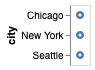

In [19]:
alt.Chart(df).mark_point().encode(
  y='city',
)

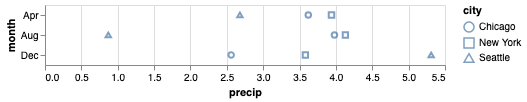

In [28]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='month',
    shape='city'
)

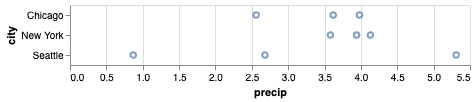

In [40]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='city'
)

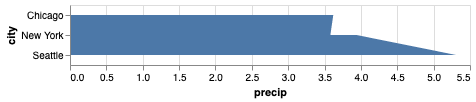

In [54]:
alt.Chart(df).mark_area().encode(
    alt.X('precip'),
    alt.Y('city')
)

You can override type of vairable with encoding specificiation - https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types

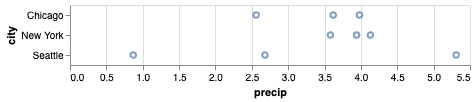

In [44]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city:N') 
)

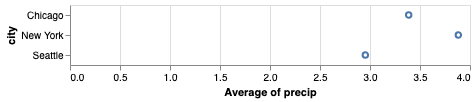

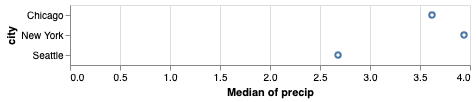

In [50]:
# summarize data
# "mean", "average", "median", "q1", "q3", "min", "max" 
# For other aggregations that produce values outside of the raw data domain (e.g. "count", "sum" )
alt.Chart(df).mark_point().encode(
    x='average(precip)', #, average, sum, etc.
    y='city'
).display()
alt.Chart(df).mark_point().encode(
    x='median(precip)', #, average, sum, median, etc.
    y='city'
).display()

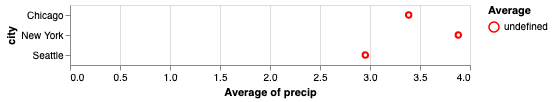

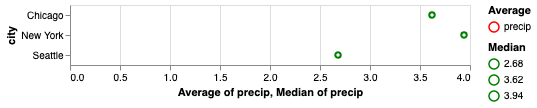

In [159]:
a = alt.Chart(df).mark_point(color='red').encode(
    alt.X('average(precip)'), #, average, sum, etc.
    y='city',
    color=alt.Color('Average:N', scale=alt.Scale(range=['red']))
).display()

a = alt.Chart(df).mark_point(color='red').encode(
    alt.X('average(precip)'), #, average, sum, etc.
    y='city',
    color=alt.Color('average(precip):N', title='Average', scale=alt.Scale(range=['red'], domain=['precip']))
)


m = alt.Chart(df).mark_point(color='green').encode(
    x='median(precip)', #, average, sum, median, etc.
    y='city',
    color=alt.Color('median(precip):N', title='Median', scale=alt.Scale(range=['green'], domain=['precip']))
)
(a+m).resolve_scale(color='independent')

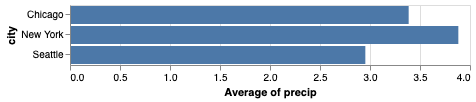

In [51]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

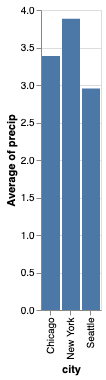

In [52]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

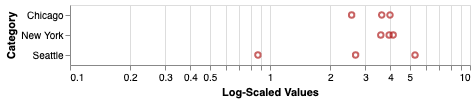

In [55]:
alt.Chart(df).mark_point(color='firebrick').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Log-Scaled Values')),
  alt.Y('city', axis=alt.Axis(title='Category')),
)

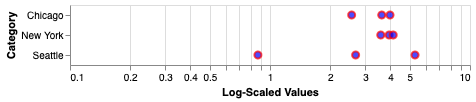

In [77]:
#if just specify color, it is like specifying stroke only
alt.Chart(df).mark_point(stroke='red', size=50, fill='blue').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Log-Scaled Values')),
  alt.Y('city', axis=alt.Axis(title='Category')),
)

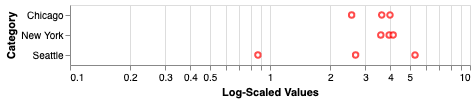

In [82]:
#if just specify color, it is like specifying stroke and fill='white'
alt.Chart(df).mark_point(stroke='red', fill='white').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Log-Scaled Values')),
  alt.Y('city', axis=alt.Axis(title='Category')),
)

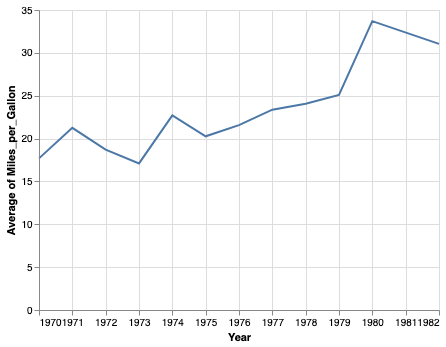

In [83]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

To combine multiple charts into one, `+` them

To view charts separately, `.display()` them

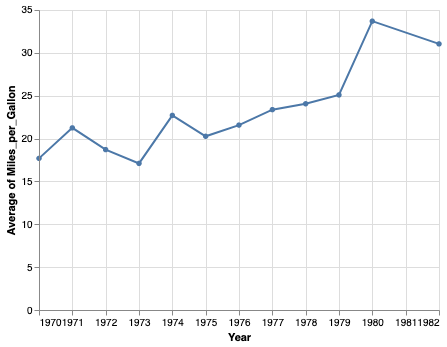

In [84]:
line = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

point = alt.Chart(cars).mark_circle().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

line + point

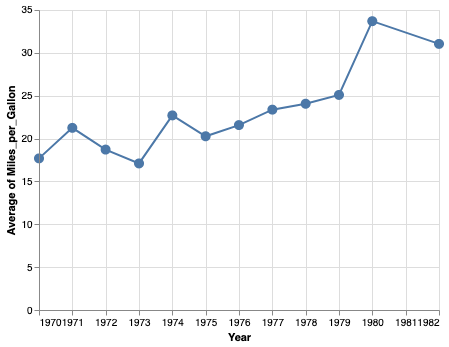

In [90]:
mpg = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

mpg + mpg.mark_circle(size=100)

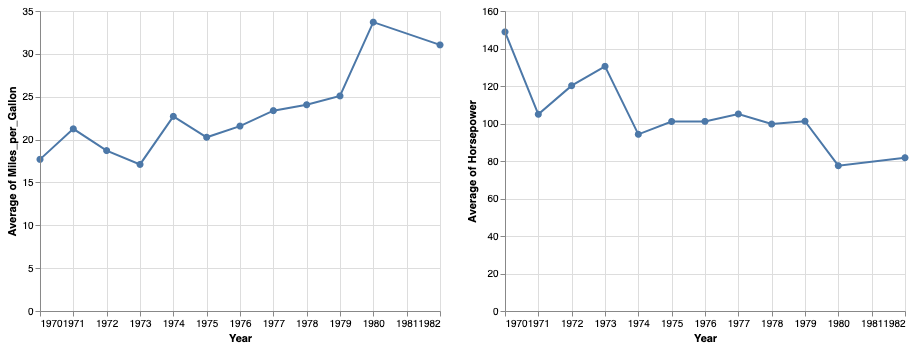

In [92]:
hp = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Horsepower)')
)

(mpg + mpg.mark_circle(size=50)) | (hp + hp.mark_circle(size=50))